## ✤ HW-4 is done by Dayana Kassenova - BDA-1903 group.

### Task:
From
https://contentservice.kz/catalog/
take all data with category:   "Продукты питания, напитки"
The attributes: Category, Subcategory, Title, brend,  country, url of product, 
Example: 

+ •	Молочные продукты и яйца
+ •	Йогурт
+ •	ЙОГУРТ 2.5% МАЛИНА LE'VITAL ЭМИЛЬ СТ 2Х180Г , 
+ •	ТМ Эмиль
+ •	KZ
+ •	https://contentservice.kz/product/4870005354639-kz-yogurt-emil-tvor-desert-s-malinoy-25-200gr-stak

take a note: check  your code works sequentially and properly, and save to excel.
+ •	Bonus: 
+ •	Parse all Data From the site. 
+ •	Any statistics



### IMPORTING MUST-HAVE LIBRARIES FOR SCRAPPING:

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd

In [ ]:
link = 'https://contentservice.kz/yogurt-1/'
requestt = requests.get(link)

In [ ]:
print(requestt.status_code) # Success! The page has loaded correctly

200


### ✤ Selecting a links for my SubCategory - "Yoghurts":

**✤ Here, I created a function, which will show us main pages of Subcategory:**

In [ ]:
def selectPageLink(link):
    #importing libraries:
    import pandas as pd
    from bs4 import BeautifulSoup
    import requests
    # selecting "ul" with specific class:
    requestt = requests.get(link)
    soup = BeautifulSoup(requestt.content,'lxml')
    ul = soup.find('ul', {'class' : 'pagination category-pagination'})
    #creating a list , where willbe stored pages:
    link_list = []
    for i in range(0, len(ul.find_all('a', {'aria-label' : ''}))):
        link_list.append('https://contentservice.kz' + ul.find_all('a', {'aria-label' : ''})[i]['href'])
    return link_list

**✤ Now, I want to retrieve Links for my "Yoghurts Subcategory":**
+ We can see that, there are only, 7 web pages are located in this category:

In [ ]:
# using above function:
selectPageLink(link)

['https://contentservice.kz/yogurt-1/',
 'https://contentservice.kz/yogurt-1/page2/',
 'https://contentservice.kz/yogurt-1/page3/',
 'https://contentservice.kz/yogurt-1/page4/',
 'https://contentservice.kz/yogurt-1/page5/',
 'https://contentservice.kz/yogurt-1/page6/',
 'https://contentservice.kz/yogurt-1/page7/']

**✤ At this stage, I am going to create a function,which will return Each product's Link in 1 Webpage:**

In [ ]:
def selectEachProduct(link):
    # again requesting to my lnk:
    requestt = requests.get(link)
    soup = BeautifulSoup(requestt.content,'lxml')
    
    # I select div, and search for product links:
    div = soup.find('div', {'class' : 'catalog__grid-view'})
    # creating a list , where will be stored pages:
    link_list = []
    # look through the loop, to all links:
    
    for i in range(0, len(div.find_all('a', {'class' : 'link-gray'}))):
        link_list.append('https://contentservice.kz' + div.find_all('a', {'class' : 'link-gray'})[i]['href'])
    return link_list

**✤ As an example, Let's select links to each product, which is located in Fifth Page Link:**

In [ ]:
print(len(selectEachProduct('https://contentservice.kz/yogurt-1/page5/')))

24


In [ ]:
# by abpve function:
selectEachProduct('https://contentservice.kz/yogurt-1/page5/')

['https://contentservice.kz/product/4870206414064-kz-yogurt-bio-balans-imuno-klubnika-vitaminypribiotiki-310gr-pb',
 'https://contentservice.kz/product/4870206414071-kz-yogurt-bio-balans-imuno-granat-vitaminypribiotiki-310gr-pb',
 'https://contentservice.kz/product/4870206414149-kz-yogurt-pitevoy-danone-persikmarakuyya-25-270ml-pb',
 'https://contentservice.kz/product/4870206414156-kz-yogurt-pitevoy-danone-klubnika-25-270ml-pb',
 'https://contentservice.kz/product/4870206413012-kz-yogurt-pitevoy-danone-bio-balans-immuno-complex-granat-930ml-16-pb',
 'https://contentservice.kz/product/4870206413258-kz-yogurt-pitevoy-danone-bio-balans-imuno-kompleks-malinashipovnik-930ml-pb',
 'https://contentservice.kz/product/4870206413029-kz-yogurt-pitevoy-danone-bio-balans-immuno-complex-klubn-930ml-16-pb',
 'https://contentservice.kz/product/4870207311850-kz-prostokvasha-foodmaster-bio-s-vanil-32-900ml-pb',
 'https://contentservice.kz/product/4870207312888-kz-snezhok-foodmaster-sladkiy-2-900ml-flp',

**✤ And Here, I using one of the links, in order to retrieve PRODUCT DETAILS:** 

In [ ]:
link =  'https://contentservice.kz/product/4870206414149-kz-yogurt-pitevoy-danone-persikmarakuyya-25-270ml-pb'
requestt = requests.get(link)

**✤ Now, I am going to make a function, which will show Product Information:**

In [ ]:
def DetailsOfProduct(link):
    
    # again requesting to my lnk:
    requestt = requests.get(link)
    soup = BeautifulSoup(requestt.content,'lxml')
    
    details = []
    # CATEGORY   choosing HTML ol and ul, and specific classes:
    details.append(soup.find('ol', {'class' : 'breadcrumb'}).find_all('li')[2].get_text())
    # SUBCATEGORY
    details.append(soup.find('ol', {'class' : 'breadcrumb'}).find_all('li')[3].get_text())
    # TITLE
    details.append(soup.find('div', {'class' : 'col-lg-9 col-md-8 col-sm-12'}).find('h1').get_text().replace('\n', '').strip())
    # BRAND
    details.append(soup.find('ul', {'class' : 'list-unstyled list-lg-pad'}).find('li').get_text())
    # COUNTRY
    details.append(soup.find('ul', {'class' : 'list-unstyled list-lg-pad'}).find('span')['title'])
    # lINK
    details.append(link)
    return details

✤ Selecting all data about this product from the link:

In [ ]:
DetailsOfProduct('https://contentservice.kz/product/4870206414149-kz-yogurt-pitevoy-danone-persikmarakuyya-25-270ml-pb')

['Молочные продукты и яйца',
 'Йогурт',
 'Йогурт 2.5% питьевой Персик-Маракуйя Danone п/бут 270г',
 'ТМ Danone',
 'KZ',
 'https://contentservice.kz/product/4870206414149-kz-yogurt-pitevoy-danone-persikmarakuyya-25-270ml-pb']

**✤ To see all products for one specific link:**

In [ ]:
def showProductForLink(link):
    requestt = requests.get(link)
    soup = BeautifulSoup(requestt.content,'lxml')
    # an array(list)
    array = []
    for i in range(0, len(selectEachProduct(link))):
        array.append(DetailsOfProduct(selectEachProduct(link)[i]))
    return array

**✤ As an example, showing 24 products details in a list from 5th page link:** 

In [ ]:
showProductForLink('https://contentservice.kz/yogurt-1/page5/')

[['Молочные продукты и яйца',
  'Йогурт',
  'Йогурт 1.2% обогащенный бифидобактериями и витаминами Клубника Имуно Био Баланс п/бут 310г',
  'ТМ Био Баланс',
  'KZ',
  'https://contentservice.kz/product/4870206414064-kz-yogurt-bio-balans-imuno-klubnika-vitaminypribiotiki-310gr-pb'],
 ['Молочные продукты и яйца',
  'Йогурт',
  'ЙОГУРТ BIO БАЛАНС ИМУНО ГРАНАТ ВИТАМИНЫ+ПРИБИОТИКИ 310ГР П/Б',
  'ТМ Био Баланс',
  'KZ',
  'https://contentservice.kz/product/4870206414071-kz-yogurt-bio-balans-imuno-granat-vitaminypribiotiki-310gr-pb'],
 ['Молочные продукты и яйца',
  'Йогурт',
  'Йогурт 2.5% питьевой Персик-Маракуйя Danone п/бут 270г',
  'ТМ Danone',
  'KZ',
  'https://contentservice.kz/product/4870206414149-kz-yogurt-pitevoy-danone-persikmarakuyya-25-270ml-pb'],
 ['Молочные продукты и яйца',
  'Йогурт',
  'Йогурт 2.5% питьевой Клубника Danone п/бут 270г',
  'ТМ Danone',
  'KZ',
  'https://contentservice.kz/product/4870206414156-kz-yogurt-pitevoy-danone-klubnika-25-270ml-pb'],
 ['Молочные прод

In [ ]:
link = 'https://contentservice.kz/yogurt-1/'
requestt = requests.get(link)

### let's scrap data into a table columns:

In [ ]:
dataset = pd.DataFrame(columns=["Category", "SubCategory", "Title", "Brand", "Country", "Link"])
dataset

,Category,SubCategory,Title,Brand,Country,Link


In [ ]:
# count is 0, after it will increase by 1:
count = 0
for a in range(0, len(selectPageLink(link))):
    
    # go through the 2-dimensional array, with loop:
    for b in range(0, len(selectEachProduct(selectPageLink(link)[a]))):
        
        # here, select each product details:
        dataset.loc[count] = DetailsOfProduct(selectEachProduct(selectPageLink(link)[a])[b])
        count = count + 1

### ✤ Finally, we  have our dataset with columns of Category, SubCategory, Title,Brand,Country,Link:

In [ ]:
dataset

,Category,SubCategory,Title,Brand,Country,Link
0,Молочные продукты и яйца,Йогурт,Йогурт 2.5% из козьего молока Zeren ст 200мл,ТМ Zeren,KZ,https://contentservice.kz/product/710535169287...
1,Молочные продукты и яйца,Йогурт,Йогурт 4% из козьего молока Zeren п/бут 300мл,ТМ Zeren,KZ,https://contentservice.kz/product/710535169089...
2,Молочные продукты и яйца,Йогурт,Йогурт 4% из козьего молока Клубника Zeren п/б...,ТМ Zeren,KZ,https://contentservice.kz/product/710535169225...
3,Молочные продукты и яйца,Йогурт,Йогурт 3% Турецкий Kokshe ст 360г,ТМ Kokshe,KZ,https://contentservice.kz/product/487023543001...
4,Молочные продукты и яйца,Йогурт,Йогурт 1.5% Клубника-малина Nәtige т/п 450г,ТМ Nәtige,KZ,https://contentservice.kz/product/487000375130...
...,...,...,...,...,...,...
163,Молочные продукты и яйца,Йогурт,Пудинг 3.2% молочный ультрапастеризованный Шок...,ТМ Ehrmann,RU,https://contentservice.kz/product/460677960830...
164,Молочные продукты и яйца,Йогурт,Продукт йогуртный 0.3% пастеризованный Киви-кр...,ТМ Ehrmann,RU,https://contentservice.kz/product/460701427022...
165,Молочные продукты и яйца,Йогурт,Продукт йогуртный 7.5% пастеризованный Абрикос...,ТМ Ehrmann,RU,https://contentservice.kz/product/460701427009...
166,Молочные продукты и яйца,Йогурт,Продукт йогуртный 0.3% пастеризованный Вишня+Н...,ТМ Ehrmann,RU,https://contentservice.kz/product/460701427021...


### ✤ Now, I can save my data into EXCEL FILE:

In [ ]:
dataset.to_excel("Yoghurts.xlsx")

### ✤ Let's , make some analysis with my dataset from excel:

In [ ]:
# Importing 'must-have' Libraries like these:
import numpy as np  # to access data in any formats.
import seaborn as sns # to make graphs,correlation
import matplotlib.pyplot as plt # to plot
import pandas as pd

In [ ]:
data = pd.read_excel(r'Yoghurts.xlsx')

### ✤ I want to know, how many unique Countries:

In [ ]:
data['Country'].unique()

array(['KZ', 'RU', 'KG'], dtype=object)

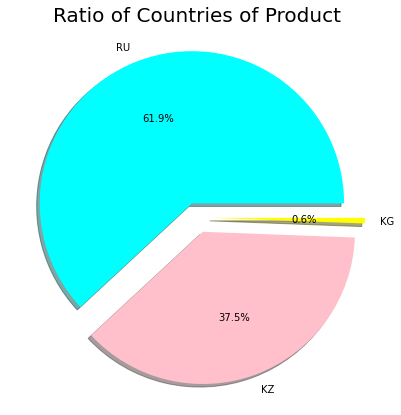

In [ ]:
# showing graph by plotting it in form of "pie-chart"-> more interesting, colorful, specific size,
# having legend,shadow, percentages, division by using 'explode() function':

labels=data['Country'].value_counts().index
# details about color:
colors=['aqua','pink','yellow']
# explode like division in a pizza:
explode=[0.1, 0.1, 0.1]

values=data['Country'].value_counts().values
plt.figure(figsize=(7,7))
# plotting a pie chart with properties:
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Ratio of Countries of Product',color='black',fontsize=20)

# executing:
plt.show()

### ✤ I want to know, how many unique BRANDS:

In [ ]:
data['Brand'].unique()

array(['ТМ Zeren', 'ТМ Kokshe', 'ТМ Nәtige', 'ТМ Активиа', 'ТМ Danone',
       'ТМ Bio Max', 'ТМ Эмиль', 'ТМ Чудо', 'ТМ Epica', 'ТМ Ehrmann',
       'ТМ Food Master', 'ТМ Растишка', 'ТМ Actimel', 'ТМ Campina',
       'ТМ Услада', 'ТМ Даниссимо', 'ТМ Био Баланс', 'ТМ No Brand',
       'ТМ Агуша', 'ТМ Имунеле', 'ТМ Актуаль', 'ТМ Amiran'], dtype=object)

In [ ]:
len(data['Brand'].unique())

22

In [ ]:
brands = data['Brand'].value_counts()
print(brands)

ТМ Чудо           22
ТМ Epica          20
ТМ Активиа        17
ТМ Ehrmann        17
ТМ Food Master    16
ТМ Campina        16
ТМ Эмиль          11
ТМ Bio Max         8
ТМ Actimel         7
ТМ Растишка        6
ТМ Danone          5
ТМ Био Баланс      5
ТМ Zeren           3
ТМ Имунеле         3
ТМ Даниссимо       2
ТМ Nәtige          2
ТМ Агуша           2
ТМ Услада          2
ТМ Актуаль         1
ТМ No Brand        1
ТМ Amiran          1
ТМ Kokshe          1
Name: Brand, dtype: int64


No handles with labels found to put in legend.


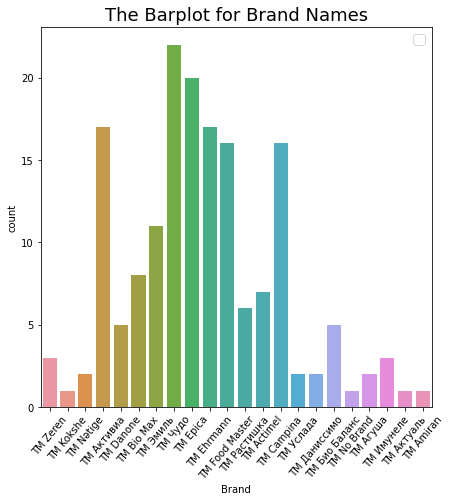

In [ ]:
# Plotting a Barplot:
fig,ax = plt.subplots(figsize = (7,7))
sns.countplot(x = data['Brand'])
plt.title('The Barplot for Counting Brand Types',color='black', fontsize = 18)

# rotating, so that labels will be suited:
plt.xticks(rotation = 50)
# plt.legend(fontsize=14)

# ✤  Conclusion

###  ✤  As we can see from charts, there are Russian Products (61.9 %) and Kazakhstan (37.5 %) and least is Kyrgystan ( 0.6 %) Yoghurt Products.

###  ✤ Mostly, we have product brands such as ТМ Чудо - 22, ТМ Epica   -  20, ТМ Активиа  - 17.

###  ✤ At least, we have  not so much brands like ТМ Услада -2, ТМ Amiran-1, ТМ Kokshe - 1.

### ✤ So, we see which product brands are more demanded, tasty and most favourite choose of People.

###  ✤ As a result, we can scrap any data, by categories and brands. And make analysis on them.